#NAMA    : I Putu Eka Suartana 
#Email   : putuek0510@gmail.com
#Project : Klasifikasi Gambar

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import shutil



2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-23 18:59:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.03MB/s    in 54s     

2021-07-23 19:00:06 (5.71 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()



tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split



x = df['path']
y = df['tag']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.399, random_state=42)

df_tr = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})
df_val = pd.DataFrame({'path':x_val,
                       'tag':y_val,
                       'set':'validation'
})


In [ ]:
import shutil
from tqdm.notebook import tqdm as tq
datasource_path = base_dir
dataset_path = "dataset/"
df_all = df_tr.append([df_val]).reset_index(drop=1)\

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
Data = df_tr.append([df_val]).reset_index(drop=1)

print(Data.groupby(['set','tag']).size(),'\n')


set         tag     
train       paper       429
            rock        426
            scissors    459
validation  paper       283
            rock        300
            scissors    291
dtype: int64 



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator (
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

val_datagen = ImageDataGenerator (
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'categorical',
    shuffle = True)

val_generator = train_datagen.flow_from_directory(
    'dataset/validation/',
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'categorical',
    shuffle = True)

num_class = val_generator.num_classes

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= 0.97 and logs.get('val_accuracy') >= 0.97):
            print("\n----------SELESAI------------") 
            self.model.stop_training = True 

myCallback =  Callback()

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


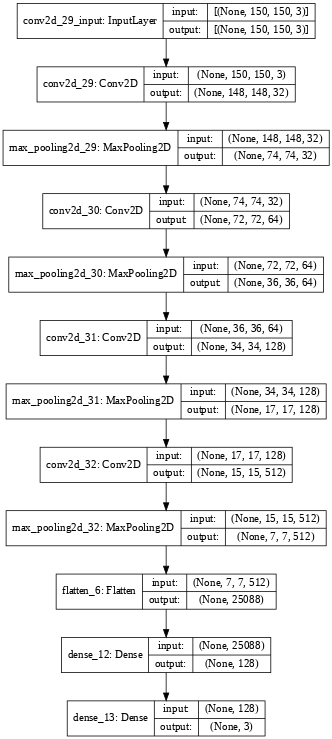

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
history = model.fit(
  train_generator,
  steps_per_epoch=20,
  epochs=100,
  validation_data=val_generator,
  validation_steps=5, 
  verbose=2,
  callbacks=[myCallback])

Epoch 1/100
20/20 - 2s - loss: 1.7595 - accuracy: 0.2125 - val_loss: 1.1015 - val_accuracy: 0.1500
Epoch 2/100
20/20 - 1s - loss: 1.1033 - accuracy: 0.3205 - val_loss: 1.0871 - val_accuracy: 0.4000
Epoch 3/100
20/20 - 1s - loss: 1.1142 - accuracy: 0.3375 - val_loss: 1.1256 - val_accuracy: 0.3000
Epoch 4/100
20/20 - 1s - loss: 1.1024 - accuracy: 0.3625 - val_loss: 1.0808 - val_accuracy: 0.4000
Epoch 5/100
20/20 - 1s - loss: 1.1815 - accuracy: 0.3875 - val_loss: 1.0714 - val_accuracy: 0.5500
Epoch 6/100
20/20 - 1s - loss: 1.1055 - accuracy: 0.4250 - val_loss: 1.0215 - val_accuracy: 0.6500
Epoch 7/100
20/20 - 1s - loss: 1.0441 - accuracy: 0.5385 - val_loss: 1.2935 - val_accuracy: 0.4000
Epoch 8/100
20/20 - 1s - loss: 0.9038 - accuracy: 0.6125 - val_loss: 0.5752 - val_accuracy: 0.8500
Epoch 9/100
20/20 - 1s - loss: 0.5956 - accuracy: 0.8000 - val_loss: 0.5726 - val_accuracy: 0.8000
Epoch 10/100
20/20 - 1s - loss: 0.4921 - accuracy: 0.8000 - val_loss: 0.5483 - val_accuracy: 0.7500
Epoch 11/

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

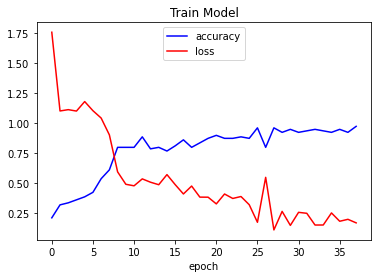

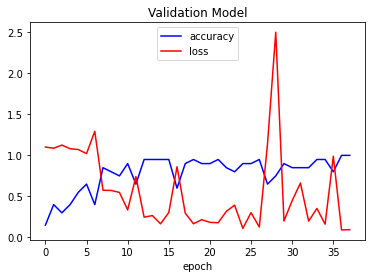

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['loss'], color='red')
plt.title('Train Model')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper center')
plt.show()

plt.plot(history.history['val_accuracy'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Validation Model')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper center')
plt.show()

Saving 1oKnUgV2CdCaQUUX.png to 1oKnUgV2CdCaQUUX.png
1oKnUgV2CdCaQUUX.png
Paper


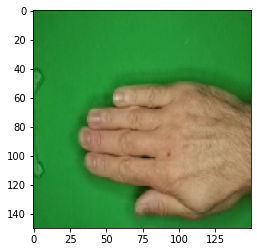

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')